In [1]:
import scanpy as sc
import squidpy as sq
import imageio
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import anndata
import skimage.exposure
import seaborn as sns
import skimage
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
img = sq.datasets.visium_hne_image()
adata = sq.datasets.visium_hne_adata()

<IPython.core.display.Javascript object>

In [3]:
img_fiducials = "/Users/giovanni.palla/Datasets/20200909_PublicVisium_giovanni.palla_LIGHWEIGHT/20191205_10XVisium_MouseBrainCoronal_giovanni.palla/spatial/detected_tissue_image.jpg"

<IPython.core.display.Javascript object>

In [4]:
img_detected_tissue = imageio.imread(img_fiducials,format="jpg",as_gray=True)

<IPython.core.display.Javascript object>

In [5]:
thresh = skimage.filters.threshold_otsu(img_detected_tissue,nbins=128)
binary = img_detected_tissue < thresh

<IPython.core.display.Javascript object>

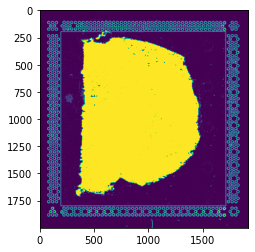

<IPython.core.display.Javascript object>

In [6]:
# fig, ax = plt.subplots(figsize=(3, 5))
plt.imshow(binary, origin="upper",)
# ax.axes.xaxis.label.set_visible(False)
# ax.axes.yaxis.label.set_visible(False)
# # get legend colors to plot later
# colors, labels = ax.get_legend_handles_labels()
# ax.get_legend().remove()
# save figure
# plt.tight_layout()
plt.savefig('figures/hne/spatial_otsu_thresholding_raw.png', dpi=300, bbox_inches='tight')


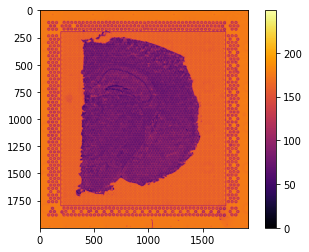

<IPython.core.display.Javascript object>

In [7]:
plt.imshow(img_detected_tissue, cmap="inferno",)
plt.colorbar()

In [8]:
adata.uns["spatial"]["V1_Adult_Mouse_Brain"]["images"]["hires"].shape

(2000, 1921, 3)

<IPython.core.display.Javascript object>

In [9]:
adata.uns["spatial"]["V1_Adult_Mouse_Brain"]["images"]["detected_tissue"] = img_detected_tissue
adata.uns["spatial"]["V1_Adult_Mouse_Brain"]["images"]["binary"] = binary

<IPython.core.display.Javascript object>

In [10]:
adata.uns["spatial"]["V1_Adult_Mouse_Brain"]["scalefactors"]["tissue_hires_scalef"]

0.17011142

<IPython.core.display.Javascript object>

In [11]:
imgcont_detected = sq.im.ImageContainer(binary, scale=adata.uns["spatial"]["V1_Adult_Mouse_Brain"]["scalefactors"]["tissue_hires_scalef"],library_id="V1_Adult_Mouse_Brain")

<IPython.core.display.Javascript object>

In [12]:
sq.im.calculate_image_features(adata, imgcont_detected, features="summary", key_added="features", library_id="V1_Adult_Mouse_Brain",show_progress_bar=False)

<IPython.core.display.Javascript object>

In [13]:
adata.obsm["features"].columns

Index(['summary_ch-0_quantile-0.9', 'summary_ch-0_quantile-0.5',
       'summary_ch-0_quantile-0.1', 'summary_ch-0_mean', 'summary_ch-0_std'],
      dtype='object')

<IPython.core.display.Javascript object>

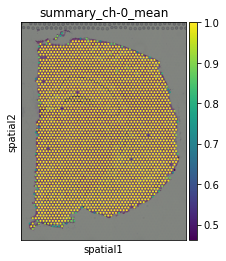

<IPython.core.display.Javascript object>

In [14]:
sc.pl.spatial(sq.pl.extract(adata,"features"), color=["summary_ch-0_mean",])

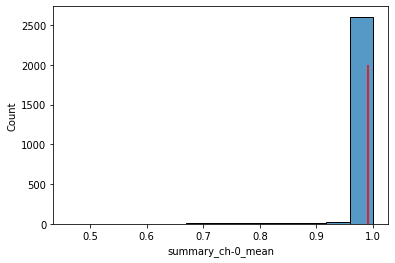

<IPython.core.display.Javascript object>

In [15]:
quant = np.quantile(adata.obsm["features"]["summary_ch-0_mean"],0.05)
sns.histplot(adata.obsm["features"]["summary_ch-0_mean"])
plt.vlines(quant, 0, 2000, "red")

In [25]:
quant_thres = {}
for i in [0.01,0.05,0.1,0.2]:
    quant = np.quantile(adata.obsm["features"]["summary_ch-0_mean"],i)
    filtered_series = pd.Categorical(adata.obsm["features"]["summary_ch-0_mean"] < quant).astype(str)
    adata.obs[f"quantile_{i}_channel_0"] = filtered_series
    quant_thres[f"thres_{i}"] = filtered_series

<IPython.core.display.Javascript object>

/Users/giovanni.palla/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'quantile_0.01_channel_0' as categorical
/Users/giovanni.palla/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'quantile_0.05_channel_0' as categorical
/Users/giovanni.palla/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in

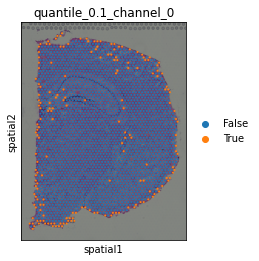

<IPython.core.display.Javascript object>

In [26]:
sc.pl.spatial(adata, color="quantile_0.1_channel_0")

In [21]:
viewer = imgcont_detected.interactive(adata, library_id=["V1_Adult_Mouse_Brain"])

/Users/giovanni.palla/miniconda3/envs/squidpy/lib/python3.8/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


<IPython.core.display.Javascript object>

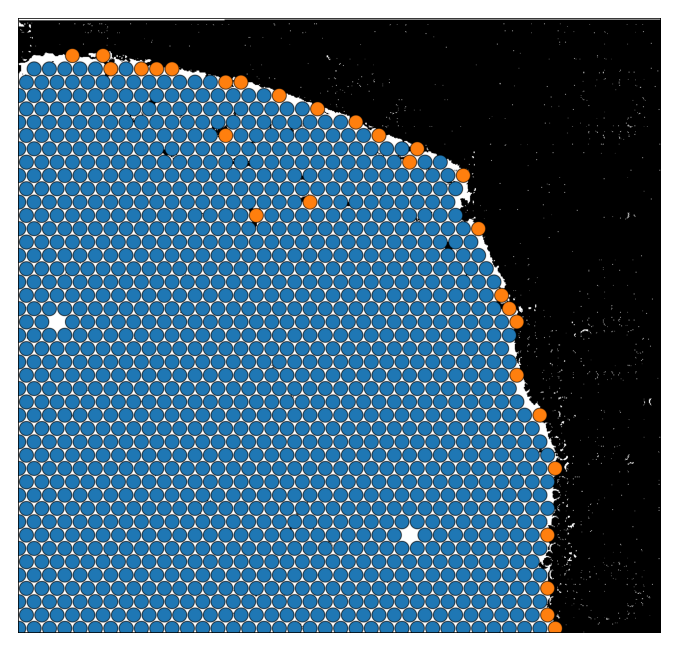

<IPython.core.display.Javascript object>

In [128]:
viewer.screenshot()

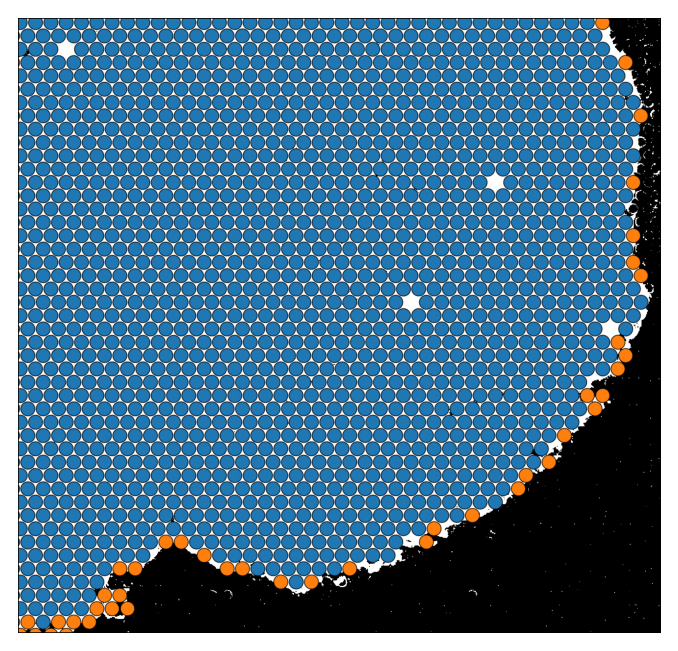

<IPython.core.display.Javascript object>

In [129]:
viewer.screenshot()

In [27]:
pd.DataFrame(quant_thres)

,thres_0.01,thres_0.05,thres_0.1,thres_0.2
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,True
4,False,False,False,False
...,...,...,...,...
2683,False,False,False,False
2684,False,False,False,False
2685,False,False,False,False
2686,False,False,False,False


<IPython.core.display.Javascript object>

In [28]:
pd.DataFrame(quant_thres).to_csv("./data/quantile_channel0.csv.gz",index=False)

<IPython.core.display.Javascript object>